# Question 1

## Part (a)

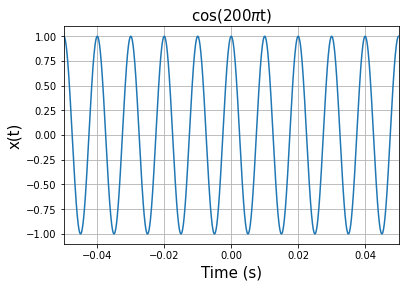

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

fs = 10000
t_lim = 1

t = np.linspace(-t_lim, t_lim, num = (2*t_lim*fs+1))
x = np.cos(200 * np.pi * t)

plt.plot(t,x)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('x(t)', fontsize = 15)
plt.title(r"cos(200$\pi$t)", fontsize = 15)
plt.xlim(-0.05,0.05)
plt.grid()
plt.show()

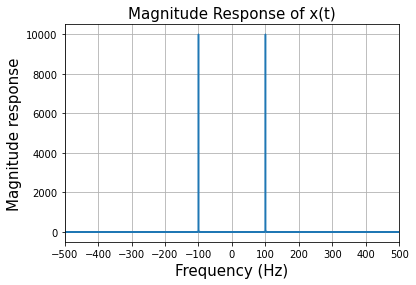

In [ ]:
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), 1/fs)
plt.plot(freq, abs(X))
plt.xlim(-500,500)
plt.xticks(np.linspace(-500,500,11))
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Magnitude response', fontsize = 15)
plt.title("Magnitude Response of x(t)", fontsize = 15)
plt.grid()
plt.show()

The given signal is a $\text{cosine}$ wave of frequency $100 \text{ Hz}$.

Thus, the signal has two impulses at $100\text{ Hz}$ and $-100 \text{ Hz}$ frequencies.

## Part (b)

The maximum frequency content of the given signal is $100 \text{ Hz}$

By the Nyquist theorem, the minimum sampling rate (considering uniform sampling) so that the signal can be recovered from its samples without any distortion is $$ f_s > 200 \text{ Hz} $$

Any frequency greater than $200 \text{ Hz}$ can reconstruct the signal without any distortion.

## Part (c)

If the signal is sampled at $150 \text{ Hz}$, it is sampled at a rate lower than the Nyquist rate. This means aliasing will occur on reconstruction. 

The frequencies present in the reconstructed signal will be
$$ (150 - 100) \text{ Hz} = 50 \text{ Hz} $$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


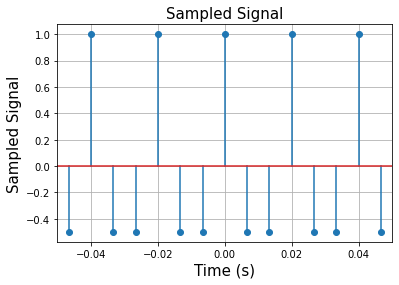

In [ ]:
fs1 = 150
ts = np.linspace(-t_lim, t_lim, num = (2 * t_lim * fs1 + 1))

x_samp = np.cos(200 * np.pi * ts)

plt.stem(ts, x_samp)
plt.xlim(-0.05,0.05)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Sampled Signal', fontsize = 15)
plt.title(r"Sampled Signal", fontsize = 15)
plt.grid()
plt.show()

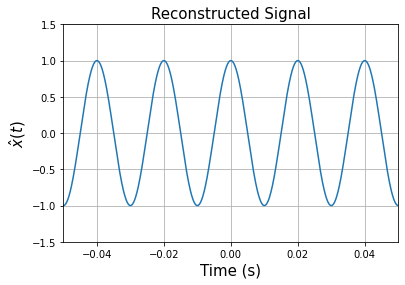

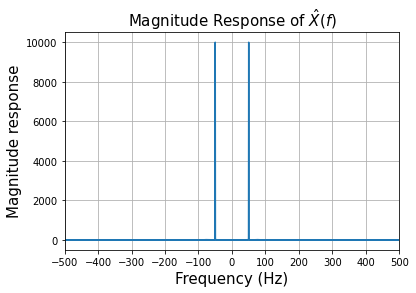

In [ ]:
x_hat = 0

# Sinc interpolation
for i in np.arange(len(x_samp)):
  x_hat += x_samp[i] * np.sinc(fs1 * (t - ts[i]))

X_hat = np.fft.fft(x_hat)
freq_hat = np.fft.fftfreq(len(x_hat), 1/fs)

plt.plot(t, x_hat)
plt.xlim(-0.05,0.05)
plt.ylim(-1.5,1.5)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel(r'$\hat{x}(t)$', fontsize = 15)
plt.title("Reconstructed Signal", fontsize = 15)
plt.grid()
plt.show()

plt.plot(freq_hat, abs(X_hat))
plt.xlim(-500,500)
plt.xticks(np.linspace(-500,500,11))
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Magnitude response', fontsize = 15)
plt.title(r"Magnitude Response of $\hat{X}(f)$", fontsize = 15)
plt.grid()
plt.show()

## Part (d)

For a signal $\text{cos}(2 \pi f_0 t)$ to have the same output frequency as in part (c), that is $50 \text{ Hz}$, we need $$ |m\times 150 - f_0| = 50 $$ for some integer $m$. This is satisfied for $$ f_0 = 150m \pm 50 \text{ Hz} $$

# Question 2

## $x[n] = \delta [n]$

### Part (a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


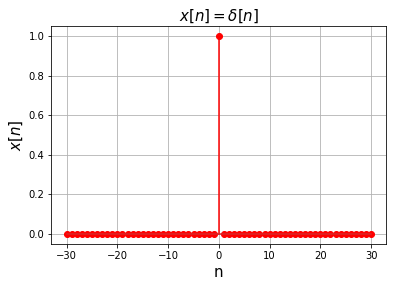

In [ ]:
n1 = np.arange(-30,31)
delta = np.zeros(np.shape(n1))
delta[30] = 1

plt.stem(n1, delta, 'r-', markerfmt = 'or')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x[n]$', fontsize = 15)
plt.title(r'$x[n] = \delta [n]$', fontsize = 15)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


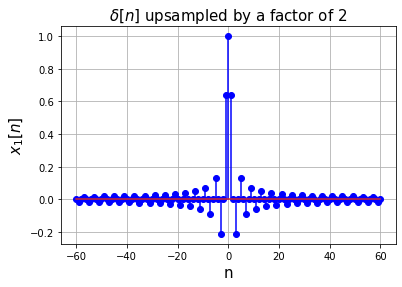

In [ ]:
import scipy.signal

n2 = np.linspace(-60,60, num = 121)

delta_2 = scipy.signal.resample(delta, 2*len(delta))

plt.stem(n2, delta_2[:-1], 'b-', markerfmt = 'ob')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x_1[n]$', fontsize = 15)
plt.title(r'$\delta [n]$ upsampled by a factor of 2', fontsize = 15)
plt.grid()
plt.show()

### Part (b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


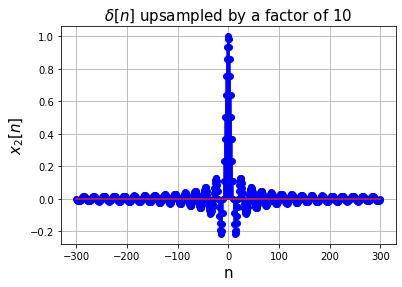

In [ ]:
n3 = np.linspace(-300,300,num = 601)

delta_3 = scipy.signal.resample(delta, 10*len(delta))

plt.stem(n3, delta_3[:-9], 'b-', markerfmt = 'ob')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x_2[n]$', fontsize = 15)
plt.title(r'$\delta [n]$ upsampled by a factor of 10', fontsize = 15)
plt.grid()
plt.show()

### Part (c)

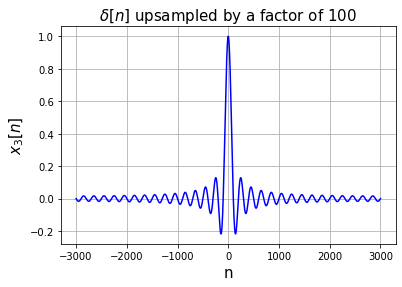

In [ ]:
n4 = np.linspace(-3000,3000,num = 6001)

delta_4 = scipy.signal.resample(delta, 100*len(delta))

plt.plot(n4, delta_4[:-99], 'b-')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x_3[n]$', fontsize = 15)
plt.title(r'$\delta [n]$ upsampled by a factor of 100', fontsize = 15)
plt.grid()
plt.show()

As can be seen from the above plots, as we increase the samples more and more, the function resembles a $\text{sinc}$ function. This is because the $scipy.signal.resample()$ function does a low pass interpolation (sinc interpolation) of the given samples. Thus, on low pass filtering $\delta[n]$, we get back $\text{sinc}[n]$.

## $x[n] = \text{cos}(0.2\pi n)$

### Part (a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


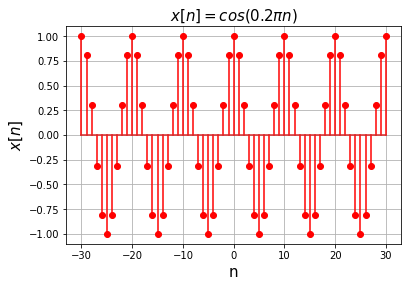

In [ ]:
x_cos = np.cos(0.2 * np.pi * n1)

plt.stem(n1, x_cos, 'r-', markerfmt = 'or')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x[n]$', fontsize = 15)
plt.title(r'$x[n] = cos(0.2\pi n)$', fontsize = 15)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


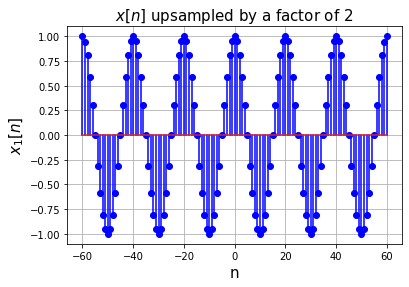

In [ ]:
x_cos_2 = scipy.signal.resample(x_cos, 2*len(x_cos))

plt.stem(n2, x_cos_2[:-1], 'b-', markerfmt = 'ob')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x_1[n]$', fontsize = 15)
plt.title(r'$x[n]$ upsampled by a factor of 2', fontsize = 15)
plt.grid()
plt.show()

### Part (b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


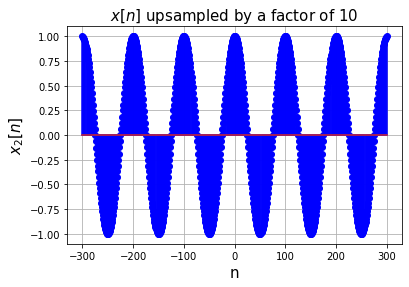

In [ ]:
x_cos_3 = scipy.signal.resample(x_cos, 10*len(x_cos))

plt.stem(n3, x_cos_3[:-9], 'b-', markerfmt = 'ob')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x_2[n]$', fontsize = 15)
plt.title(r'$x[n]$ upsampled by a factor of 10', fontsize = 15)
plt.grid()
plt.show()

### Part (c)

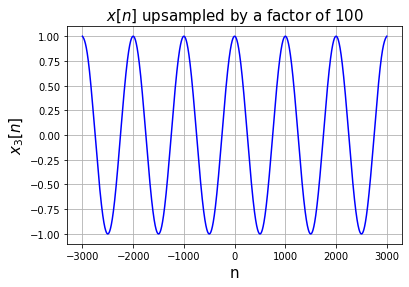

In [ ]:
x_cos_4 = scipy.signal.resample(x_cos, 100*len(x_cos))

plt.plot(n4, x_cos_4[:-99], 'b-')
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$x_3[n]$', fontsize = 15)
plt.title(r'$x[n]$ upsampled by a factor of 100', fontsize = 15)
plt.grid()
plt.show()

In the case of $x[n] = \text{cos}(0.2\pi n)$, the function is itself a low-pass signals, and thus on $\text{sinc}$ interpolation, we get back the same signal. Thus, the same form of $\text{cos}(0.2\pi n)$ is maintained even on upsampling using $scipy.signal.resample()$ function.

**Note:** Please note that I have increased the index of the samples in the three upsampled signals since $n$ can only take integer values. However, the extra samples obtained are placed in between the original smaples.

# Question 3

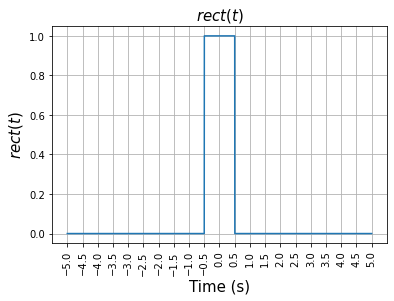

In [ ]:
t3_lim = 5
t3 = np.linspace(-t3_lim, t3_lim, num  = (2*t3_lim*1000 + 1))

x_rect = np.zeros(np.shape(t3))
x_rect[int((t3_lim-0.5)*1000):int((t3_lim+0.5)*1000 + 1)] = 1

plt.plot(t3, x_rect)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel(r'$rect(t)$', fontsize = 15)
plt.title(r'$rect(t)$', fontsize = 15)
plt.xticks(ticks = np.arange(-5,5.1,0.5), rotation = 'vertical')
plt.grid()
plt.show()

## Part (a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


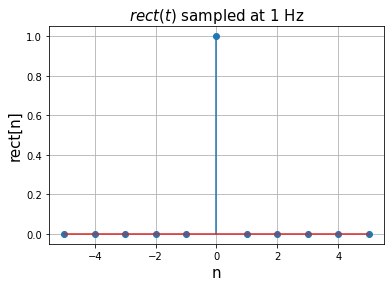

In [ ]:
# Signal sampled at 1 Hz frequency
fs_1 = 1
n_samp1 = np.arange(-5,5.1)
x_samp1 = np.zeros(np.shape(n_samp1))
x_samp1[5] = 1

plt.stem(n_samp1, x_samp1)
plt.xlabel('n', fontsize = 15)
plt.ylabel('rect[n]', fontsize = 15)
plt.title(r'$rect(t)$ sampled at $1$ Hz', fontsize = 15)
plt.grid()
plt.show()

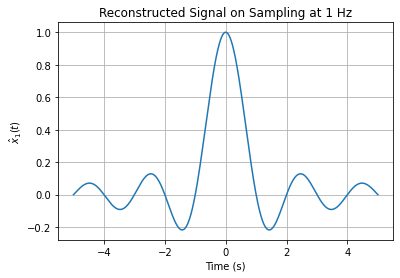

In [ ]:
# Reconstructing the signal
x_hat_1 = np.zeros(np.shape(t3))
delay_1 = 1 / fs_1

for i in np.arange(len(n_samp1)):
  x_hat_1 += x_samp1[i] * np.sinc(fs_1 * (t3 - n_samp1[i] * delay_1))

plt.plot(t3, x_hat_1)
plt.xlabel('Time (s)')
plt.ylabel(r'$\hat{x}_1(t)$')
plt.title('Reconstructed Signal on Sampling at 1 Hz')
plt.grid()
plt.show()

In [ ]:
# Finding Integral Squared Error

err_1 = np.trapz(abs(x_rect - x_hat_1) ** 2, t3)

print(err_1)

0.23419492825503818


## Part (b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


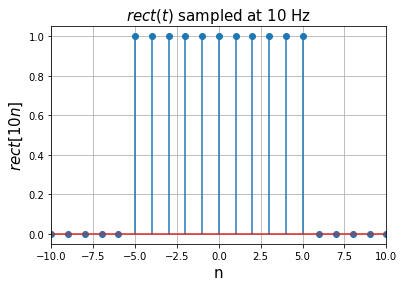

In [ ]:
# Signal sampled at 10 Hz frequency
fs_2 = 10
n_samp2 = np.arange(-5 * fs_2,5 * fs_2 + 0.1)
x_samp2 = np.zeros(np.shape(n_samp2))
x_samp2[int((5 - 0.5) * fs_2) : int((5 + 0.5) * fs_2) + 1] = 1

plt.stem(n_samp2, x_samp2)
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$rect[10n]$', fontsize = 15)
plt.title(r'$rect(t)$ sampled at $10$ Hz', fontsize = 15)
plt.xlim(-10, 10)
plt.grid()
plt.show()

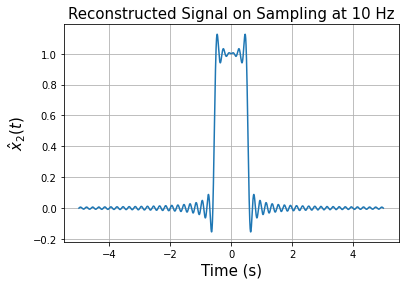

In [ ]:
# Reconstructing the signal
x_hat_2 = np.zeros(np.shape(t3))
delay_2 = 1 / fs_2

for i in np.arange(len(n_samp2)):
  x_hat_2 += x_samp2[i] * np.sinc(fs_2 * (t3 - n_samp2[i] * delay_2))

plt.plot(t3, x_hat_2)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel(r'$\hat{x}_2(t)$', fontsize = 15)
plt.title('Reconstructed Signal on Sampling at 10 Hz', fontsize = 15)
plt.grid()
plt.show()

In [ ]:
# Finding Integral Squared Error

err_2 = np.trapz(abs(x_rect - x_hat_2) ** 2,t3)

print(err_2)

0.07672372593972686


## Part (c)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


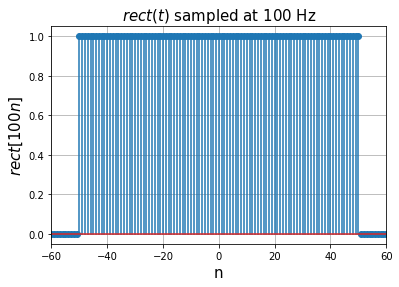

In [ ]:
# Signal sampled at 100 Hz frequency
fs_3 = 100
n_samp3 = np.arange(-5 * fs_3,5 * fs_3 + 0.1)
x_samp3 = np.zeros(np.shape(n_samp3))
x_samp3[int((5 - 0.5) * fs_3) : int((5 + 0.5) * fs_3) + 1] = 1

plt.stem(n_samp3, x_samp3)
plt.xlabel('n', fontsize = 15)
plt.ylabel(r'$rect[100n]$', fontsize = 15)
plt.title(r'$rect(t)$ sampled at $100$ Hz', fontsize = 15)
plt.xlim(-60, 60)
plt.grid()
plt.show()

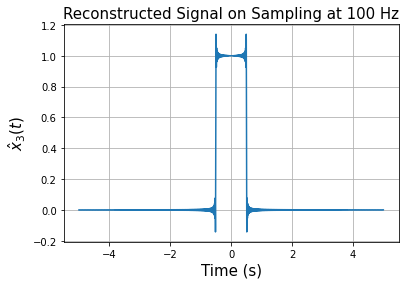

In [ ]:
# Reconstructing the signal
x_hat_3 = np.zeros(np.shape(t3))
delay_3 = 1 / fs_3

for i in np.arange(len(n_samp3)):
  x_hat_3 += x_samp3[i] * np.sinc(fs_3 * (t3 - n_samp3[i] * delay_3))

plt.plot(t3, x_hat_3)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel(r'$\hat{x}_3(t)$', fontsize = 15)
plt.title('Reconstructed Signal on Sampling at 100 Hz', fontsize = 15)
plt.grid()
plt.show()

In [ ]:
# Finding Integral Squared Error

err_3 = np.trapz(abs(x_rect - x_hat_3) ** 2,t3)

print(err_3)

0.0066414403846754115


Since $rect(t)$ is not a bandlimited function, in fact it contains infinite number of harmonics, it cannot be approximated by any low-pass characterization. This means that the Nyquist rate for this signal is $\infty$. Thus, sampling this signal at any finite frequency will lead to aliasing, which is visible in the reconstructed signals. There are extreme oscillations especially at the edges, which when it happens in the frequency domain (due to windowing with a rectangular window) is called as Gibbs' phenomenon. 

As the sampling frequency increases, the approximation of the signal gets better and better, even though the original signal is never reconstructed. This is visible in both the plotted reconstructed signals as well as the squared errors in reconstruction. This is due to the fact that we are incorporating more and more harmonics of the original signal in the reconstruction.